$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 3 $$

# `01` Assignment 01
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

## `+` Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout, BatchNormalization, Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


## `+` Load & Preprocess CIFAR 10 Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


### Preview the Images

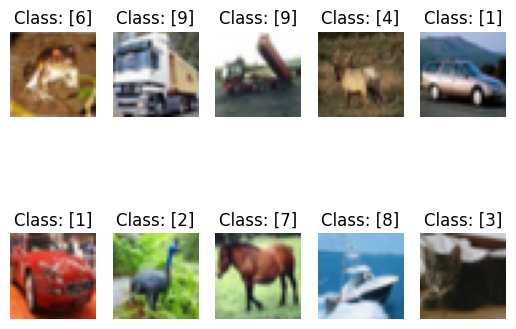

In [ ]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f'Class: {y_train[i]}')
    plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
# plot first few images


### Feature Rescaling

⚓ Rescaling input from [0:255] to [0:1]

In [ ]:
# Rescale Input
X_train = X_train / 255.
X_test  = X_test / 255.

In [ ]:
print(f" Range of X_train: ({X_train.min()}, {X_train.max()})")
print(f" Range of X_test: ({X_test.min()}, {X_test.max()})")

 Range of X_train: (0.0, 1.0)
 Range of X_test: (0.0, 1.0)


### OneHotEncode Target Variable

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test  = keras.utils.to_categorical(y_test)

## `+` Set Global Parameters

In [ ]:
# Hyperparameters
BATCH_SIZE  = 128
NUM_CLASSES = 10
EPOCHS      = 50
RANDOM_SEED = 42

In [ ]:
keras.utils.set_random_seed(RANDOM_SEED)

## `i` Trial no. 1

### Model Training

In [ ]:
#Our Model >> DNN
model1 = Sequential(Flatten(input_shape=(32, 32, 3)))
model1.add(Dense(1344, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1280, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(640, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))


In [ ]:
model1.compile(optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 1344)              4130112   
                                                                 
 dropout_4 (Dropout)         (None, 1344)              0         
                                                                 
 dense_8 (Dense)             (None, 1280)              1721600   
                                                                 
 dropout_5 (Dropout)         (None, 1280)              0         
                                                                 
 dense_9 (Dense)             (None, 640)               819840    
                                                                 
 dropout_6 (Dropout)         (None, 640)              

In [ ]:
History = model1.fit (X_train, y_train,
                     epochs = EPOCHS,
                     batch_size = BATCH_SIZE,validation_split = 0.2 )

Epoch 1/50
313/313 [==============================] - 11s 32ms/step - loss: 2.0847 - accuracy: 0.2095 - val_loss: 1.8969 - val_accuracy: 0.3025
Epoch 2/50
313/313 [==============================] - 10s 32ms/step - loss: 1.8864 - accuracy: 0.3052 - val_loss: 1.8167 - val_accuracy: 0.3350
Epoch 3/50
313/313 [==============================] - 10s 31ms/step - loss: 1.8371 - accuracy: 0.3268 - val_loss: 1.7824 - val_accuracy: 0.3523
Epoch 4/50
313/313 [==============================] - 10s 31ms/step - loss: 1.7946 - accuracy: 0.3451 - val_loss: 1.7484 - val_accuracy: 0.3745
Epoch 5/50
313/313 [==============================] - 10s 32ms/step - loss: 1.7658 - accuracy: 0.3571 - val_loss: 1.7018 - val_accuracy: 0.3857
Epoch 6/50
313/313 [==============================] - 10s 33ms/step - loss: 1.7380 - accuracy: 0.3725 - val_loss: 1.7189 - val_accuracy: 0.3936
Epoch 7/50
313/313 [==============================] - 10s 32ms/step - loss: 1.7071 - accuracy: 0.3803 - val_loss: 1.6691 - val_accuracy:

### Model Evaluation

In [ ]:
training_eval= model1.evaluate(X_train, y_train)
print("loss for training", training_eval [0], "Accuracy for training", training_eval[1])

1563/1563 [==============================] - 7s 5ms/step - loss: 1.1873 - accuracy: 0.5865
loss for training 1.1872670650482178 Accuracy for training 0.5865399837493896


In [ ]:
testing_eval = model1.evaluate(X_test, y_test)
print("loss for testing", testing_eval [0], "Accuracy for testing", testing_eval[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.4066 - accuracy: 0.5035
loss for testing 1.406613826751709 Accuracy for testing 0.5034999847412109


### Result Visualization

In [ ]:
# Plot the training and validation accuracy and loss


In [ ]:
ACCURACY1 = History.history['accuracy']

In [ ]:
ACCURACY1_val = History.history['val_accuracy']

In [ ]:
loss1 = History.history['loss']

In [ ]:
loss1_val = History.history['val_loss']

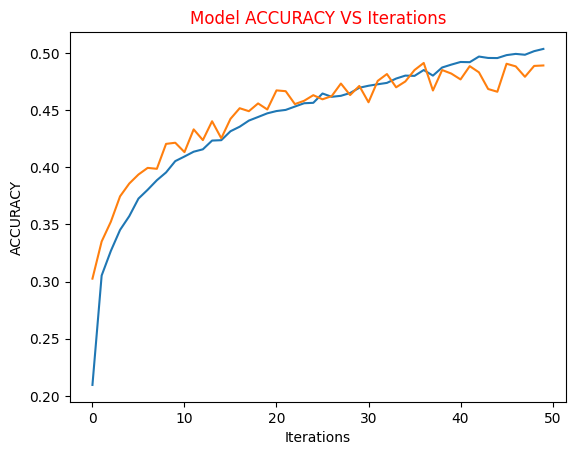

In [ ]:
plt.plot(ACCURACY1)
plt.plot(ACCURACY1_val)
plt.xlabel('Iterations')
plt.ylabel('ACCURACY')
plt.title('Model Accuracy VS Iterations', color='red')
plt.show();

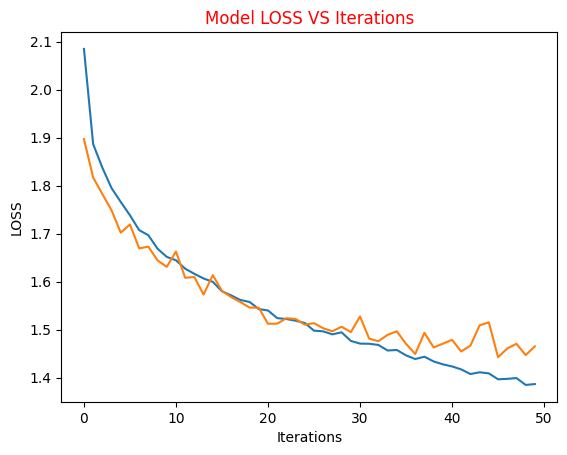

In [ ]:
plt.plot(loss1)
plt.plot(loss1_val)
plt.xlabel('Iterations')
plt.ylabel('LOSS')
plt.title('Model Loss VS Iterations', color='red')
plt.show();

## `ii` Trial no. 2

### Model Training

### Model Evaluation

### Result Visualization

In [ ]:
# Plot the training and validation accuracy and loss


**Note:** Add more trials and explore different hyperparameters and design decisions.

------------------------------

# Assignment 02
- Design your `deep convolutional neural network` ( to classify the `CIFAR 10` images into one of the 10 classes
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

$\frac{N - F + 2P}{S} + 1$

$P = \frac{F - 1}{2}$

## `i` Trial no. 1

In [ ]:
#Our Model >> CNN
model2 = Sequential()
model2.add(Conv2D(50, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model2.add(MaxPool2D())
model2.add(Conv2D(30, (5, 5), padding='same', activation='relu'))
model2.add(MaxPool2D())
model2.add(Conv2D(20, (5, 5), padding='same', activation='relu'))
model2.add(MaxPool2D())
model2.add(Conv2D(10, (5, 5), padding='same', activation='relu'))
model2.add(MaxPool2D())
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 15, 15, 50)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 15, 15, 30)        37530     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 7, 7, 30)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 20)          15020     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 3, 3, 20)         

### Model Training

In [ ]:
model2.compile(optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
History_2 = model2.fit (X_train, y_train,
                     epochs = EPOCHS,
                     batch_size = BATCH_SIZE, validation_split = 0.2 )

Epoch 1/50
313/313 [==============================] - 117s 369ms/step - loss: 1.8201 - accuracy: 0.3045 - val_loss: 1.5653 - val_accuracy: 0.4143
Epoch 2/50
313/313 [==============================] - 113s 360ms/step - loss: 1.4503 - accuracy: 0.4575 - val_loss: 1.3562 - val_accuracy: 0.5046
Epoch 3/50
313/313 [==============================] - 123s 395ms/step - loss: 1.2850 - accuracy: 0.5268 - val_loss: 1.2980 - val_accuracy: 0.5289
Epoch 4/50
313/313 [==============================] - 131s 419ms/step - loss: 1.1860 - accuracy: 0.5711 - val_loss: 1.1565 - val_accuracy: 0.5836
Epoch 5/50
313/313 [==============================] - 125s 400ms/step - loss: 1.1019 - accuracy: 0.6028 - val_loss: 1.1126 - val_accuracy: 0.6005
Epoch 6/50
313/313 [==============================] - 126s 404ms/step - loss: 1.0423 - accuracy: 0.6249 - val_loss: 1.1005 - val_accuracy: 0.6136
Epoch 7/50
313/313 [==============================] - 115s 366ms/step - loss: 0.9822 - accuracy: 0.6482 - val_loss: 1.0416 -

### Model Evaluation

In [ ]:
training_eval2= model2.evaluate(X_train, y_train)
print("loss for training", training_eval2 [0], "Accuracy for training", training_eval2[1])

1563/1563 [==============================] - 57s 36ms/step - loss: 0.4918 - accuracy: 0.8505
loss for training 0.4917812645435333 Accuracy for training 0.8504800200462341


In [ ]:
testing_eval2 = model2.evaluate(X_test, y_test)
print("loss for testing", testing_eval2 [0], "Accuracy for testing", testing_eval2 [1])

313/313 [==============================] - 9s 29ms/step - loss: 1.2640 - accuracy: 0.6727
loss for testing 1.264021873474121 Accuracy for testing 0.6726999878883362


### Result Visualization

In [ ]:
# Plot the training accuracy and loss


In [ ]:
ACCURACY2 = History_2.history['accuracy']

In [ ]:
ACCURACY2_val = History_2.history['val_accuracy']

In [ ]:
loss2 = History_2.history['loss']

In [ ]:
loss2_val = History_2.history['val_loss']

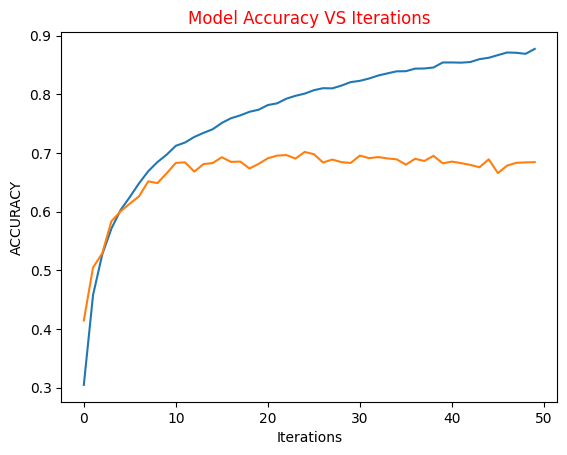

In [ ]:
plt.plot(ACCURACY2)
plt.plot(ACCURACY2_val)
plt.xlabel('Iterations')
plt.ylabel('ACCURACY')
plt.title('Model Accuracy VS Iterations', color='red')
plt.show();

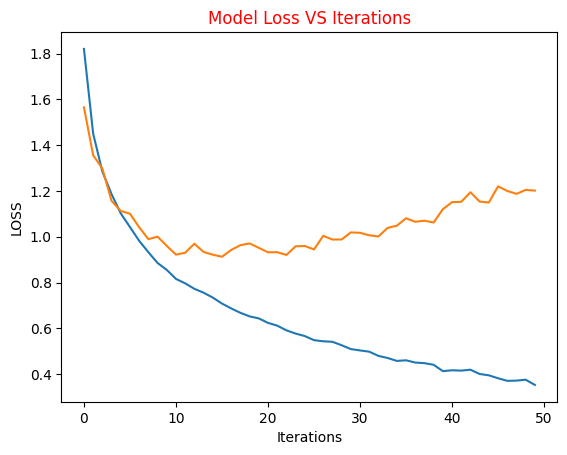

In [ ]:
plt.plot(loss2)
plt.plot(loss2_val)
plt.xlabel('Iterations')
plt.ylabel('LOSS')
plt.title('Model Loss VS Iterations', color='red')
plt.show();

## `ii` Trial no. 2

### Model Training

### Model Evaluation

### Result Visualization

In [ ]:
# Plot the training accuracy and loss


---

# `03` Assignment 03
- Repeat Assignment 1 and 2 using MNIST dataset
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

## `+` Load MNIST Dataset

In [2]:
(X_train_2, y_train_2), (X_test_2, y_test_2) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"Shape of X_train: {X_train_2.shape}")
print(f"Shape of y_train: {y_train_2.shape}")
print(f"Shape of X_test: {X_test_2.shape}")
print(f"Shape of y_test: {y_test_2.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### OneHotEncode Target Variable

In [3]:
y_train_2 =  keras.utils.to_categorical(y_train_2)
y_test_2 =   keras.utils.to_categorical(y_test_2)

### Preview the Images

In [ ]:
# plot first few images


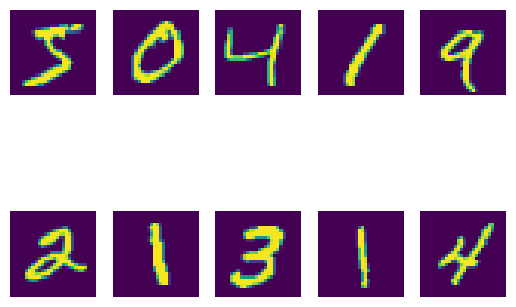

In [ ]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train_2[i])
    #plt.title(f'Class: {y_train_2[i]}')
    plt.axis('off')  # Turn off axis
plt.show()

### Rescale Independent Features

In [4]:
# Rescale the Input
X_train_2 = X_train_2 /255.
X_test_2 =  X_test_2 / 255.

## `+` Set Global Parameters

In [5]:
# Hyperparameters
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS      = 25

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [ ]:
#Our Model >> DNN
model3 = Sequential(Flatten(input_shape = (28,28) ))
model3.add(Dense(1280, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(640, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 1280)              1004800   
                                                                 
 dropout_21 (Dropout)        (None, 1280)              0         
                                                                 
 dense_49 (Dense)            (None, 640)               819840    
                                                                 
 dropout_22 (Dropout)        (None, 640)               0         
                                                                 
 dense_50 (Dense)            (None, 256)               164096    
                                                                 
 dropout_23 (Dropout)        (None, 256)             

In [ ]:
model3.compile(optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
History_3 = model3.fit (X_train_2, y_train_2,
                     epochs = EPOCHS,
                     batch_size = BATCH_SIZE,validation_split = 0.2 )

Epoch 1/25
750/750 [==============================] - 29s 36ms/step - loss: 0.2789 - accuracy: 0.9160 - val_loss: 0.1332 - val_accuracy: 0.9594
Epoch 2/25
750/750 [==============================] - 26s 35ms/step - loss: 0.1260 - accuracy: 0.9625 - val_loss: 0.1178 - val_accuracy: 0.9677
Epoch 3/25
750/750 [==============================] - 26s 35ms/step - loss: 0.0981 - accuracy: 0.9720 - val_loss: 0.1060 - val_accuracy: 0.9720
Epoch 4/25
750/750 [==============================] - 27s 36ms/step - loss: 0.0797 - accuracy: 0.9766 - val_loss: 0.0931 - val_accuracy: 0.9732
Epoch 5/25
750/750 [==============================] - 26s 35ms/step - loss: 0.0675 - accuracy: 0.9800 - val_loss: 0.1012 - val_accuracy: 0.9725
Epoch 6/25
750/750 [==============================] - 27s 36ms/step - loss: 0.0587 - accuracy: 0.9828 - val_loss: 0.0875 - val_accuracy: 0.9763
Epoch 7/25
750/750 [==============================] - 27s 36ms/step - loss: 0.0503 - accuracy: 0.9854 - val_loss: 0.1072 - val_accuracy:

#### Model Ealuation

In [ ]:
training_eval3= model3.evaluate(X_train_2, y_train_2)
print("loss for training", training_eval3 [0], "Accuracy for training", training_eval3[1])

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0311 - accuracy: 0.9943
loss for training 0.031050315126776695 Accuracy for training 0.9943000078201294


In [ ]:
testing_eval3 = model3.evaluate(X_test_2, y_test_2)
print("loss for testing", testing_eval3 [0], "Accuracy for testing", testing_eval3 [1])

313/313 [==============================] - 2s 6ms/step - loss: 0.1277 - accuracy: 0.9815
loss for testing 0.1276586949825287 Accuracy for testing 0.9815000295639038


#### Result Visualization

In [ ]:
# Plot the training accuracy and loss


In [ ]:
ACCURACY3 = History_3.history['accuracy']

In [ ]:
ACCURACY3_val = History_3.history['val_accuracy']

In [ ]:
loss3 = History_3.history['loss']

In [ ]:
loss3_val = History_3.history['val_loss']

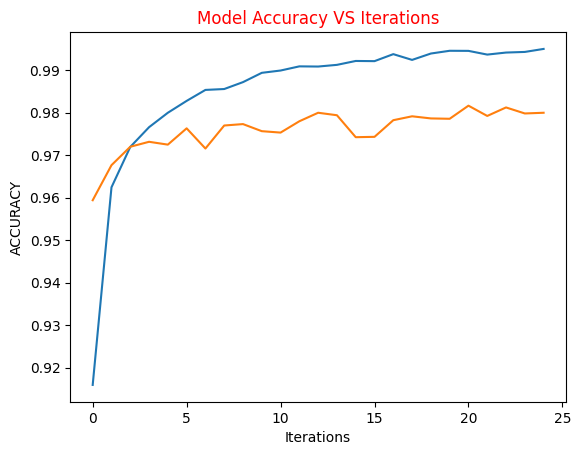

In [ ]:
plt.plot(ACCURACY3)
plt.plot(ACCURACY3_val)
plt.xlabel('Iterations')
plt.ylabel('ACCURACY')
plt.title('Model Accuracy VS Iterations', color='red')
plt.show();

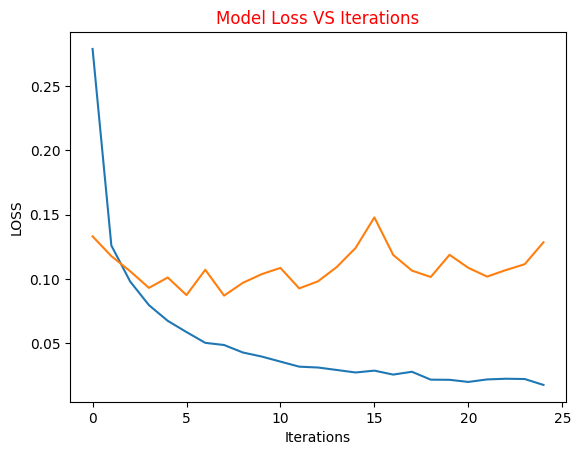

In [ ]:
plt.plot(loss3)
plt.plot(loss3_val)
plt.xlabel('Iterations')
plt.ylabel('LOSS')
plt.title('Model Loss VS Iterations', color='red')
plt.show();

### Trial no. 2

#### Model Training

#### Model Evaluation

#### Result Visualization

In [ ]:
# Plot the training accuracy and loss


## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [ ]:
X_train_2.shape, X_test_2.shape


((60000, 28, 28), (10000, 28, 28))

In [6]:
X_train_2 = X_train_2.reshape(60000,28,28,1)
X_test_2 =  X_test_2.reshape (10000,28,28,1)
X_train_2.shape, X_test_2.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
#Our Model >> CNN
model4 = Sequential()
model4.add(Conv2D(50, (3, 3), activation='relu', input_shape=X_train_2.shape[1:]))
model4.add(MaxPool2D())
model4.add(Conv2D(30, (5, 5), padding='same', activation='relu'))
model4.add(MaxPool2D())
model4.add(Conv2D(20, (5, 5), padding='same', activation='relu'))
model4.add(MaxPool2D())
model4.add(Conv2D(10, (5, 5), padding='same', activation='relu'))
model4.add(MaxPool2D())
model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(10, activation='softmax'))
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 30)        37530     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 30)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 20)          15020     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 20)          0

### Model Training

In [8]:
model4.compile(optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'], loss='categorical_crossentropy', run_eagerly=True)

In [ ]:
y_train_2.shape

(60000, 10)

In [9]:
History_4 = model4.fit(X_train_2, y_train_2,
                     epochs = EPOCHS,
                     batch_size = BATCH_SIZE, validation_split = 0.2)

Epoch 1/25


750/750 [==============================] - 51s 60ms/step - loss: 0.3291 - accuracy: 0.8933 - val_loss: 0.1009 - val_accuracy: 0.9683
Epoch 2/25
750/750 [==============================] - 42s 57ms/step - loss: 0.0813 - accuracy: 0.9764 - val_loss: 0.0793 - val_accuracy: 0.9771
Epoch 3/25
750/750 [==============================] - 42s 56ms/step - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.0577 - val_accuracy: 0.9838
Epoch 4/25
750/750 [==============================] - 40s 54ms/step - loss: 0.0450 - accuracy: 0.9868 - val_loss: 0.0588 - val_accuracy: 0.9822
Epoch 5/25
750/750 [==============================] - 42s 56ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0631 - val_accuracy: 0.9838
Epoch 6/25
750/750 [==============================] - 41s 54ms/step - loss: 0.0304 - accuracy: 0.9907 - val_loss: 0.0419 - val_accuracy: 0.9887
Epoch 7/25
750/750 [==============================] - 43s 57ms/step - loss: 0.0297 - accuracy: 0.9909 - val_loss: 0.0437 - val_accuracy: 0.9881
Epo

### Model Evaluation

In [10]:
training_eval4= model4.evaluate(X_train_2, y_train_2)
print("loss for training", training_eval4 [0], "Accuracy for training", training_eval4[1])

1875/1875 [==============================] - 40s 21ms/step - loss: 0.0204 - accuracy: 0.9956
loss for training 0.020381279289722443 Accuracy for training 0.9956333041191101


In [11]:
testing_eval4 = model4.evaluate(X_test_2, y_test_2)
print("loss for testing", testing_eval4 [0], "Accuracy for testing", testing_eval4 [1])

313/313 [==============================] - 7s 22ms/step - loss: 0.0473 - accuracy: 0.9897
loss for testing 0.04734664782881737 Accuracy for testing 0.9897000193595886


### Result Visualization

In [ ]:
# Plot the training accuracy and loss


In [12]:
ACCURACY4 = History_4.history['accuracy']

In [13]:
ACCURACY4_val = History_4.history['val_accuracy']

In [14]:
loss4 = History_4.history['loss']

In [15]:
loss4_val = History_4.history['val_loss']

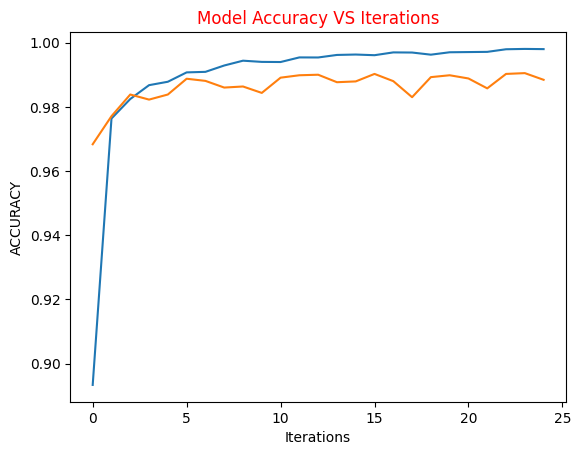

In [16]:
plt.plot(ACCURACY4)
plt.plot(ACCURACY4_val)
plt.xlabel('Iterations')
plt.ylabel('ACCURACY')
plt.title('Model Accuracy VS Iterations', color='red')
plt.show();

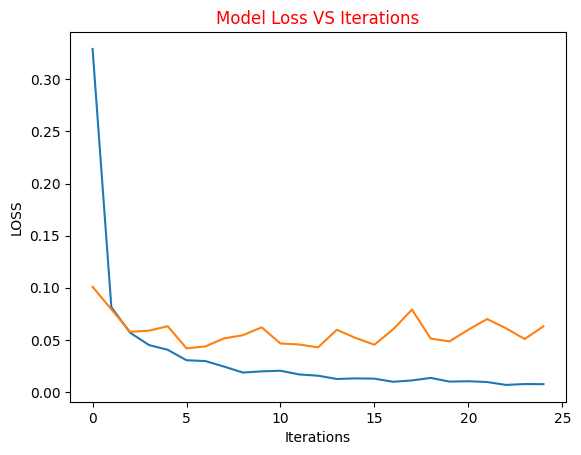

In [17]:
plt.plot(loss4)
plt.plot(loss4_val)
plt.xlabel('Iterations')
plt.ylabel('LOSS')
plt.title('Model Loss VS Iterations', color='red')
plt.show();

### Trial no. 2

#### Model Training

#### Model Evaluation

#### Result Visualization

In [ ]:
# Plot the training accuracy and loss


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$